In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from keras.layers import Dropout

%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv('data/kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
# df.info()

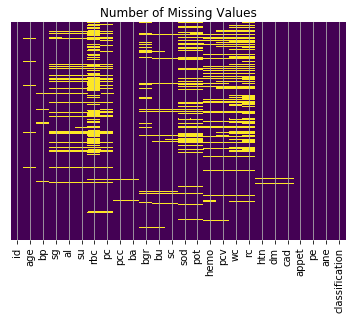

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")
plt.savefig('missing.png')

In [7]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)

In [9]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
# sns.countplot(data=df,x='rbc')
df['rbc'].fillna('normal',inplace=True)

In [11]:
# sns.countplot(data=df,x='pc')
df['pc'].fillna('normal',inplace=True)

In [12]:
df['pcc'].isnull().sum()

4

In [13]:
df['pcc'].fillna('notpresent',inplace=True)

In [14]:
df['ba'].fillna('notpresent',inplace=True)

In [15]:
df['htn'].fillna('no',inplace=True)

In [16]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['dm'].fillna('no',inplace=True)

In [17]:
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')
df['cad'].fillna('no',inplace=True)

In [18]:
df['appet'].fillna('good',inplace=True)

In [19]:
df['pe'].fillna('no',inplace=True)

In [20]:
df['ane'].fillna('no',inplace=True)

In [21]:
df['cad'] = df['cad'].replace(to_replace='ckd\t',value='ckd')

In [22]:
df['classification'] = df['classification'].replace(to_replace='ckd\t',value='ckd')

In [23]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

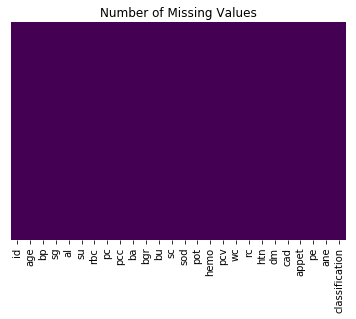

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Number of Missing Values")
plt.savefig('missing_updated.png')

In [25]:
from sklearn.preprocessing import LabelEncoder

for i in ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']:
    df[i] = LabelEncoder().fit_transform(df[i])

In [26]:
from sklearn.preprocessing import MinMaxScaler

for i in df.columns:
    df[i] = MinMaxScaler().fit_transform(df[i].astype(float).values.reshape(-1, 1))

In [27]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.000000,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.002506,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,...,0.644444,0.157025,0.441938,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005013,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,...,0.488889,0.219008,0.441938,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.007519,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.010025,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.shape

(400, 26)

In [29]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [30]:
df.drop(['id'],axis=1, inplace= True)

In [31]:
df.shape

(400, 25)

In [32]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [33]:
le = LabelEncoder()
le.fit(df.classification.unique())
df['classification'] = le.transform(df.classification)
df.head().T

,0,1,2,3,4
age,0.522727,0.056818,0.681818,0.522727,0.556818
bp,0.230769,0.000000,0.230769,0.153846,0.230769
sg,0.750000,0.750000,0.250000,0.000000,0.250000
al,0.200000,0.800000,0.400000,0.800000,0.400000
su,0.000000,0.000000,0.600000,0.000000,0.000000
rbc,1.000000,1.000000,1.000000,1.000000,1.000000
pc,1.000000,1.000000,1.000000,0.000000,1.000000
pcc,0.000000,0.000000,0.000000,1.000000,0.000000
ba,0.000000,0.000000,0.000000,0.000000,0.000000
bgr,0.211538,0.269309,0.856838,0.202991,0.179487


In [34]:
features = list(df.columns[0:24])

In [35]:
features

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [36]:
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score, classification_report
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.svm import SVC
from PIL import Image
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=5)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['classification'].values, test_size=0.30, random_state=42)

### Decision Tree Classifier

In [38]:
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X_train, y_train)
print("Train accuracy", clf.score(X_train, y_train))
print("Test accuracy", clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
clf_test = accuracy_score(y_test, y_test_pred)
print('SVM Classifier test accuracies %.4f' % (clf_test))

print(classification_report(y_test, y_test_pred))

# print(confusion_matrix(test_labels, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Train accuracy 1.0
Test accuracy 0.975
SVM Classifier test accuracies 0.9750
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.94      1.00      0.97        44

   micro avg       0.97      0.97      0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

0.975


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fn, fp, tp=confusion_matrix(y_test_pred,y_test).ravel()

print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

total=sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1]) / total
print ('Accuracy : ', accuracy*100)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score

print('roc_auc_score = ' + str(roc_auc_score(y_test_pred, y_test)))

print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall//Senstivity:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

[[73  3]
 [ 0 44]]
Accuracy: 97.5%
Accuracy :  97.5
Sensitivity :  100.0
Specificity :  93.61702127659575
roc_auc_score = 0.9680851063829787
Accuracy: 0.975
Precision: 0.9361702127659575
Recall//Senstivity: 1.0
tp: 44
fp: 3
tn: 73
fn: 0
F1 score: 0.9670329670329669


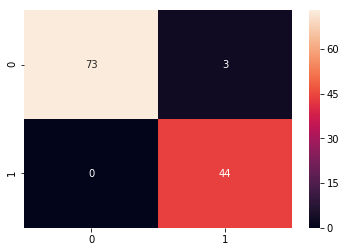

In [40]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt="d")

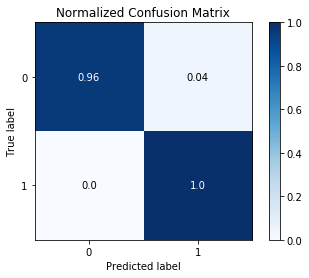

In [41]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

### Random Forest Classifier

In [42]:
clf = RandomForestClassifier(n_estimators=5)

clf.fit(X_train, y_train)
print("Train accuracy", clf.score(X_train, y_train))
print("Test accuracy", clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
clf_test = accuracy_score(y_test, y_test_pred)
print('SVM Classifier test accuracies %.4f' % (clf_test))

print(classification_report(y_test, y_test_pred))

# print(confusion_matrix(test_labels, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Train accuracy 1.0
Test accuracy 0.9833333333333333
SVM Classifier test accuracies 0.9833
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.98      0.98      0.98        44

   micro avg       0.98      0.98      0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

0.9833333333333333


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fn, fp, tp=confusion_matrix(y_test_pred,y_test).ravel()

print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

total=sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1]) / total
print ('Accuracy : ', accuracy*100)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score

print('roc_auc_score = ' + str(roc_auc_score(y_test_pred, y_test)))

print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall//Senstivity:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

[[75  1]
 [ 1 43]]
Accuracy: 98.33333333333333%
Accuracy :  98.33333333333333
Sensitivity :  98.68421052631578
Specificity :  97.72727272727273
roc_auc_score = 0.9820574162679425
Accuracy: 0.9833333333333333
Precision: 0.9772727272727273
Recall//Senstivity: 0.9772727272727273
tp: 43
fp: 1
tn: 75
fn: 1
F1 score: 0.9772727272727272


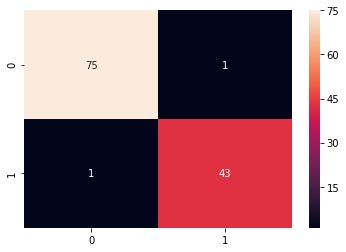

In [44]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt="d")

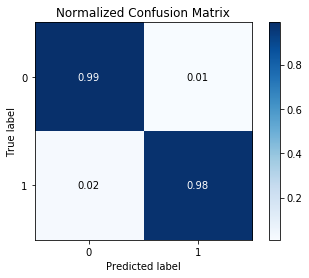

In [45]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

### XGBoost Classifier

In [46]:
clf = xgb.XGBClassifier()

clf.fit(X_train, y_train)
print("Train accuracy", clf.score(X_train, y_train))
print("Test accuracy", clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
clf_test = accuracy_score(y_test, y_test_pred)
print('SVM Classifier test accuracies %.4f' % (clf_test))

print(classification_report(y_test, y_test_pred))

# print(confusion_matrix(test_labels, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Train accuracy 1.0
Test accuracy 0.9916666666666667
SVM Classifier test accuracies 0.9917
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

   micro avg       0.99      0.99      0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

0.9916666666666667


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fn, fp, tp=confusion_matrix(y_test_pred,y_test).ravel()

print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

total=sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1]) / total
print ('Accuracy : ', accuracy*100)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score

print('roc_auc_score = ' + str(roc_auc_score(y_test_pred, y_test)))

print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall//Senstivity:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

[[75  1]
 [ 0 44]]
Accuracy: 99.16666666666667%
Accuracy :  99.16666666666667
Sensitivity :  100.0
Specificity :  97.77777777777777
roc_auc_score = 0.9888888888888889
Accuracy: 0.9916666666666667
Precision: 0.9777777777777777
Recall//Senstivity: 1.0
tp: 44
fp: 1
tn: 75
fn: 0
F1 score: 0.9887640449438203


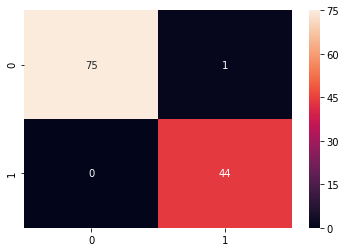

In [48]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt="d")

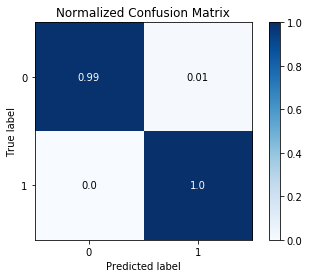

In [49]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

### AdaBoost Classifier

In [50]:
clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 250 )
clf.fit(X_train, y_train)
print("Train accuracy", clf.score(X_train, y_train))
print("Test accuracy", clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
clf_test = accuracy_score(y_test, y_test_pred)
print('SVM Classifier test accuracies %.4f' % (clf_test))

print(classification_report(y_test, y_test_pred))

# print(confusion_matrix(test_labels, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Train accuracy 1.0
Test accuracy 0.9833333333333333
SVM Classifier test accuracies 0.9833
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        44

   micro avg       0.98      0.98      0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

0.9833333333333333


In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fn, fp, tp=confusion_matrix(y_test_pred,y_test).ravel()

print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

total=sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1]) / total
print ('Accuracy : ', accuracy*100)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score

print('roc_auc_score = ' + str(roc_auc_score(y_test_pred, y_test)))

print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall//Senstivity:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

[[74  2]
 [ 0 44]]
Accuracy: 98.33333333333333%
Accuracy :  98.33333333333333
Sensitivity :  100.0
Specificity :  95.65217391304348
roc_auc_score = 0.9782608695652174
Accuracy: 0.9833333333333333
Precision: 0.9565217391304348
Recall//Senstivity: 1.0
tp: 44
fp: 2
tn: 74
fn: 0
F1 score: 0.9777777777777777


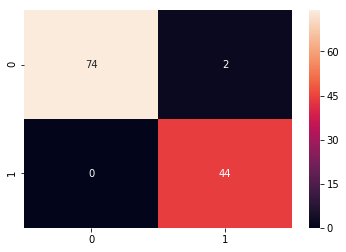

In [52]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt="d")

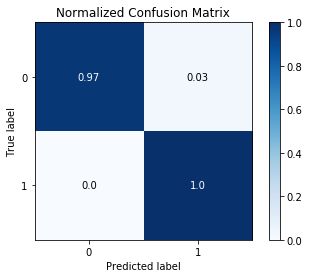

In [53]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

### Bagging Classifier

In [54]:
clf = BaggingClassifier(RandomForestClassifier(), n_estimators = 40)

clf.fit(X_train, y_train)
print("Train accuracy", clf.score(X_train, y_train))
print("Test accuracy", clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
clf_test = accuracy_score(y_test, y_test_pred)
print('SVM Classifier test accuracies %.4f' % (clf_test))

print(classification_report(y_test, y_test_pred))

# print(confusion_matrix(test_labels, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Train accuracy 1.0
Test accuracy 0.9916666666666667
SVM Classifier test accuracies 0.9917
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

   micro avg       0.99      0.99      0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

0.9916666666666667


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fn, fp, tp=confusion_matrix(y_test_pred,y_test).ravel()

print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

total=sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1]) / total
print ('Accuracy : ', accuracy*100)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score

print('roc_auc_score = ' + str(roc_auc_score(y_test_pred, y_test)))

print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall//Senstivity:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

[[75  1]
 [ 0 44]]
Accuracy: 99.16666666666667%
Accuracy :  99.16666666666667
Sensitivity :  100.0
Specificity :  97.77777777777777
roc_auc_score = 0.9888888888888889
Accuracy: 0.9916666666666667
Precision: 0.9777777777777777
Recall//Senstivity: 1.0
tp: 44
fp: 1
tn: 75
fn: 0
F1 score: 0.9887640449438203


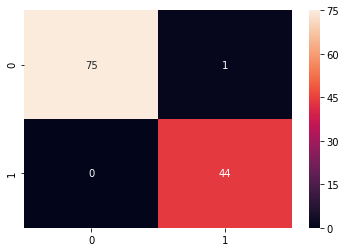

In [56]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt="d")

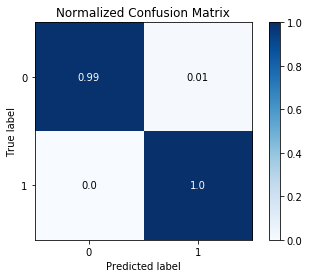

In [57]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)